# Capstone Project

In this Capstone Project you will be engaging with the stock price data from MSN Money, which can be found at:  
`../../data/histroical-stock-prices.csv`  
In this Notebook we will be looking at Pairs Trading.  

## Outline: 
1. Getting and describing the data. 

2. Exploring, cleaning and visualizing the data

3. Developing analytics
- Using Correlation
- Using Cointegration (optional)

4. Risk review: improving accuracy and realism
- Time keeps on ticking into the future
- Operational concerns

5. Extending the scope
- Ideas for further strategies
- Devloping analytics
    
6. Wrapping up

## Options
As we progress you are encouraged to take this dataset further.  You are also encouraged to explore any aspects of the data. Develop your own algorithms.  Be explicit about your inquiry and success in predicting affects on our world.

## Warning: Not financial advice
This exercise is meant purely for educational purposes, uses many simplifications and is not intended, nor should be considered as financial advice. There are many risks involved in implementation of financial trading strategies that are not considered nor described here. 

## 0. Overview
Pairs trading is a type of statistical arbitrage, which is exploiting statistical properties that we believe can make money if they continue.  
General Idea:
1) Fine two stocks which move similarly.
2) Find where the prices move apart.
3) Sell the high one and buy the low one.
4) Wait for them to come back into line.

## 1. Getting and Describing the data.

First we load the data.

In [1]:
# Import our tools
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import statsmodels
from statsmodels.tsa.stattools import coint

In [2]:
# This can be a large data set.  if you wish to only load a portion, set nrows to something like 10000
rows = None
stocks = pd.read_csv('../../data/daily-historical-sample.csv', nrows=rows)
# the larger original file 
# stocks = pd.read_csv('../../data/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv', nrows=rows)
# TODO update to msn data file 

In [3]:
!ls ../../data/daily-historical-stock-prices-1970-2018

historical_stock_prices.csv historical_stocks.csv


In [4]:
# TODO remove these cells that makes the data identical to the MSN data.  
stocks['dt'] = pd.to_datetime(stocks['date'])

In [5]:
stocks.head()# stocks = stocks[stocks['dt']>='20130101']

,Unnamed: 0,ticker,open,close,adj_close,low,high,volume,date,dt
0,70002,RRC,63.650002,62.049999,60.994125,61.250000,63.650002,2271200,2013-01-02,2013-01-02
1,70021,RRC,61.970001,63.400002,62.321163,61.630001,63.919998,1842400,2013-01-03,2013-01-03
2,70028,RRC,63.630001,65.139999,64.031532,63.439999,65.190002,1268200,2013-01-04,2013-01-04
3,70042,RRC,65.110001,65.209999,64.100365,64.430000,65.610001,1692900,2013-01-07,2013-01-07
4,70050,RRC,65.019997,64.169998,63.078049,63.389999,65.099998,1776700,2013-01-08,2013-01-08


In [6]:
sp500 = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'A','AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX','CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [7]:
stocks = stocks[stocks['dt']>='2013-01-01']
stocks = stocks[stocks['ticker'].isin(sp500)]

In [8]:
# write a smaller file for testing
# stocks.to_csv('../../data/daily-historical-sample.csv')
# TODO back on the main path

In [9]:
# Let's look at the data!
stocks.head()

,Unnamed: 0,ticker,open,close,adj_close,low,high,volume,date,dt
0,70002,RRC,63.650002,62.049999,60.994125,61.250000,63.650002,2271200,2013-01-02,2013-01-02
1,70021,RRC,61.970001,63.400002,62.321163,61.630001,63.919998,1842400,2013-01-03,2013-01-03
2,70028,RRC,63.630001,65.139999,64.031532,63.439999,65.190002,1268200,2013-01-04,2013-01-04
3,70042,RRC,65.110001,65.209999,64.100365,64.430000,65.610001,1692900,2013-01-07,2013-01-07
4,70050,RRC,65.019997,64.169998,63.078049,63.389999,65.099998,1776700,2013-01-08,2013-01-08


In [10]:
# And another way we discussed
# This method lets us know the type of columns, how many non-null values there are,
# and the size of the data set, among other things. 
stocks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619636 entries, 0 to 619635
Data columns (total 10 columns):
Unnamed: 0    619636 non-null int64
ticker        619636 non-null object
open          619636 non-null float64
close         619636 non-null float64
adj_close     619636 non-null float64
low           619636 non-null float64
high          619636 non-null float64
volume        619636 non-null int64
date          619636 non-null object
dt            619636 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 52.0+ MB


### Thought Questions: 
Which of the above ways of looking at the data is the most helpful.  What have you learned from each?

What do you see that is unusual about the 'date' column? 

What datatype should they be stored as? 

In [11]:
# And yet one more way to view your data with summary statistics of only the numerical columns
stocks.describe()

,Unnamed: 0,open,close,adj_close,low,high,volume
count,6.196360e+05,619636.000000,619636.000000,619636.000000,619636.000000,619636.000000,6.196360e+05
mean,1.087471e+07,79.067758,79.082518,75.544285,78.324008,79.797608,4.579010e+06
std,6.028124e+06,84.712340,84.713877,84.457066,83.921011,85.451040,8.639048e+06
min,7.000200e+04,1.660000,1.590000,1.590000,1.500000,1.710000,1.000000e+02
25%,5.438592e+06,38.310001,38.310001,35.458687,37.919998,38.700001,1.210700e+06
50%,1.095230e+07,60.009998,60.040001,56.349380,59.439999,60.606785,2.308300e+06
75%,1.597729e+07,92.629997,92.660004,88.014315,91.830002,93.430000,4.624100e+06
max,2.091374e+07,1919.390015,1919.650024,1919.650024,1902.540039,1925.000000,6.166205e+08


Exercise: Pandas has good datetime functionality. Convert your dates using pd.datetime so we can take advantage of them. 


In [12]:
# Code in this cell ... assign a new column stocks['dt']

#TODO remove answer to instructor resources
# stocks['dt'] = pd.to_datetime(stocks['date'])

Philosophical aside: 
You may wonder why we use a new column rather than modifying stocks column 'date'.  This is a matter of personal preference and a trade-off.  Many data scientists and engineers prefer to assign a new column because it makes the Jupyter notebook robust to running a cell twice.  These run twice bugs are a common "gotcha" of Jupyter notebooks in practice. The mathematical term for a process or function that gives the same output if you run it 2 or more times in a row is idempotent.  It also makes our code more like data engineering pipeline code, which makes the process of putting your code into data processing pipelines easier.  

On the other hand, it makes your data take up more space so if you are very concerned about memory, you might decided to change your column in place.  

In [13]:
# Lets gather the unique tickers we are working with.
tickers = stocks['ticker'].unique()

# What type do you expect tickers to be?
type(tickers)

numpy.ndarray

In [14]:
# How many stocks are we tracking?
len(tickers)

441

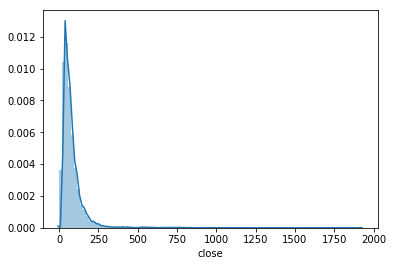

In [15]:
# Lets make some plots
sns.distplot(stocks['close'], bins=100, kde=True)


### What do you see here? What does the above chart tell us about the distribution of prices?

In [16]:
sample_tickers = ['CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB']
sample_tickers

['CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB']

We typically use close data when working with daily market data because the open is sometimes affected by the dynamics of traders reacting to new information that has accumulated overnight. 

Let's reshape our data as well so that each date is our index and each colum is the data for one ticker.  This aproach is called Tidy Data.  For more information on rearranging your data see TODO, or you can learn from the excellent work by [Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf). 

In [17]:
closes = stocks.pivot(index='dt', columns='ticker', values='adj_close')

## Now that we have our data neatly arranged we can really dive into visualizing it.  

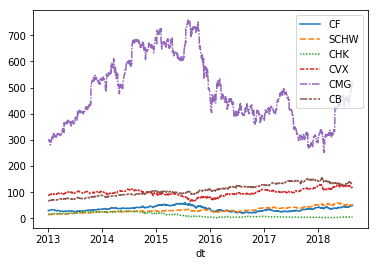

In [18]:
sns.lineplot(data=closes[sample_tickers])

In [19]:
# Looking at the small gaps in the data makes me wonder if the data is continuous.
closes.index[:50]

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15', '2013-01-16', '2013-01-17',
               '2013-01-18', '2013-01-22', '2013-01-23', '2013-01-24',
               '2013-01-25', '2013-01-28', '2013-01-29', '2013-01-30',
               '2013-01-31', '2013-02-01', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
               '2013-02-25', '2013-02-26', '2013-02-27', '2013-02-28',
               '2013-03-01', '2013-03-04', '2013-03-05', '2013-03-06',
               '2013-03-07', '2013-03-08', '2013-03-11', '2013-03-12',
               '2013-03-13', '2013-03-14'],
              dtype='datetime64[ns]', name='dt', freq=None)

It seems to be missing weekends and holidays.  Lets forward fill them as an exercise.  

Now look for your own ideas graphed in the data.



## 3. Developing analytics -Correlation

[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is the statistical tendency of two variables to move together.

In [20]:
correlation_matrix = closes.corr()

### Which are the most corelated stocks?  Do you only want positive corelations? 
Lets only select the largest correlations that are less than 1.  
Why don't we want series with corelation of 1?
Select the top 100 for this exercise.  

In [21]:
ordered_correlations = correlation_matrix.abs().unstack().sort_values(kind="quicksort")

In [22]:
ordered_correlations = ordered_correlations.dropna()

In [23]:
top = ordered_correlations[ordered_correlations<0.99]

In [24]:
top[-100:]

ticker  ticker
SYK     FIS       0.986091
FIS     SYK       0.986091
BDX     V         0.986244
V       BDX       0.986244
SCHW    HBAN      0.986254
HBAN    SCHW      0.986254
DISCA   DISCK     0.986382
DISCK   DISCA     0.986382
SWN     RRC       0.986524
RRC     SWN       0.986524
NOC     STZ       0.986613
STZ     NOC       0.986613
NEE     BDX       0.986650
BDX     NEE       0.986650
NTRS    STI       0.986666
STI     NTRS      0.986666
UNH     TXN       0.986766
TXN     UNH       0.986766
LMT     STZ       0.986817
STZ     LMT       0.986817
TXN     MSFT      0.986835
MSFT    TXN       0.986835
FIS     BDX       0.986864
BDX     FIS       0.986864
WEC     AEE       0.987033
AEE     WEC       0.987033
CTAS    TXN       0.987044
TXN     CTAS      0.987044
AMAT    LRCX      0.987095
LRCX    AMAT      0.987095
                    ...   
MMC     HON       0.988514
HON     MMC       0.988514
INTU    MA        0.988517
MA      INTU      0.988517
ESV     NE        0.988557
NE      ESV  

### Now let's implement this, with 1 pair.
We need to calculate a ratio of 1 stock's price to another, so that we can know how much of each to buy and sell.

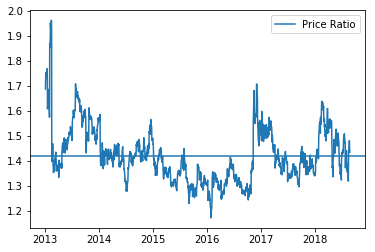

In [25]:
stock1 = closes['NOC']
stock2 = closes['STZ']
ratios = stock1 / stock2
sns.lineplot(data=ratios)
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])

Our pair of stocks do seem to float around some ratio and return to it.  At a point where the ratio is far away from its mean, we will by some of stock1 and sell short some of stock2 so that we are net nutral in our exposure to the stocks.

To know when is an interesting time, we will want to use the Z-score, which is the value minus the mean divided by the standard deviation.  This will tell us how unusual this move is.  


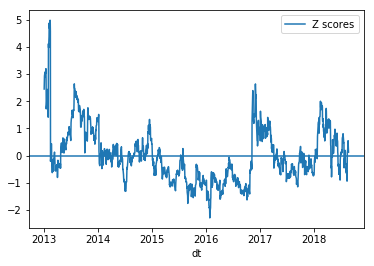

In [26]:
zscores = zscore(ratios)
sns.lineplot(x=ratios.index, y=zscores)
plt.axhline(zscores.mean()) # Thought question: Why is the blue line at 0?
plt.legend(['Z scores'])

So here we can imagine entering the trade in early 2013 as the z scroe reaches 5 and then taking our gains as the line comes back towards 0.  We could also do the same in 2016 as the z score is at -2.  We can take advantage of both positive and negative deviations.  

### The problem with correlation
Correlation is not often used in real pairs trading.  Just because two price series are correlated, we do not know that they will be profitable.  We would like to know that if there is a price difference between two stocks that grows, that it will shrink in the future.  Two stocks can be coreelated if there is a price difference that keeps on growing without a reuturn.  

So next let's look at another statistical property called cointegration.  

## 3. Developing analytics - Cointegration 
This piece is optional if you are not into statistics

Cointegration is the idea that two or more series will have a linear combination that is stationary.  In our two stock example, it means that the ratio we computed will revert back to some mean value as opposed to drifting higher or lower over time.  While corelation is the statistical tendency of two variables to move together, cointegration is a stricter requirement.  

In [27]:
coint_t, pval, crit_val = coint(stock1, stock2)
print(f'The statistic is {coint_t}, the p-value is {pval} and the critical values to be significant at the 1%/5%/10% levels are {crit_val}')

The statistic is -4.540226107728024, the p-value is 0.0010509381892640631 and the critical values to be significant at the 1%/5%/10% levels are [-3.90415834 -3.34043021 -3.0474339 ]


So we can see that our stock pair also passes the cointegration test, though that will not always be the case.  Here you can find more information on [cointegration](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html). 

#### Optional Exercise:
How would you test each of our stocks for cointegration?  Hint: Pandas has a method that we used for correlation. 

Repeat the prior steps from the corelation section and determine which would be the most promissing pairs?

## 4. Risk review: improving accuracy and realism
- Time keeps on ticking into the future
- Transation costs 
- Multiple hypothesis bias

We have ignored many of the important things that trip up real finance strategies.  

For one thing we have been simplistic about time.  Did you notice?  Where have we made coding assumptions that have lookahead bias.  That is, where have our strategies relied on statistics with information from the future?  To fix this we should be careful about backtesting, which is a process of realistically using historical data, but not using information that would not be available to a decision maker at that point in the past.  

We have also assumed it is free to trade securities.  In reality backtests will often look profitable until you take transaction costs into account, at which point the sad trombone starts playing.  If transaction costs make a strategy unprofiatble, that false opportunity can persist in the makret for a long time.  

Finally we have looked at corelations and cointegrations on how many pairs?  Given all those possibilities surely one will look promising, if just by random chance.  Their are statistics that we can adjust to take this into account.  



## 5. Your turn to move forward.

Links to LEARN portal
Links to academic papers.  Industry side.  
How 

In [28]:
#TODO add LEARN and academic resources.